# Blatt 4

## Aufgabe 2 Fourier-Legendre-Reihe
Mit Hilfe der orthonormalen Legendre-Polynome Pl(x) l¨asst sich jede Funktion auf dem
Intervall [−1, 1] analog zur Fourierreihe in eine Fourier-Legendre-Reihe entwickeln

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.integrate import quad


In [2]:
def mapcolors(n):
    """Return a list of n colors from the default colormap"""
    return [plt.cm.jet(int(x*plt.cm.jet.N/n)) for x in range(n)]

### a) Plotte die ersten sechs Legendre-Polynome (scipy.special.legendre(n)).

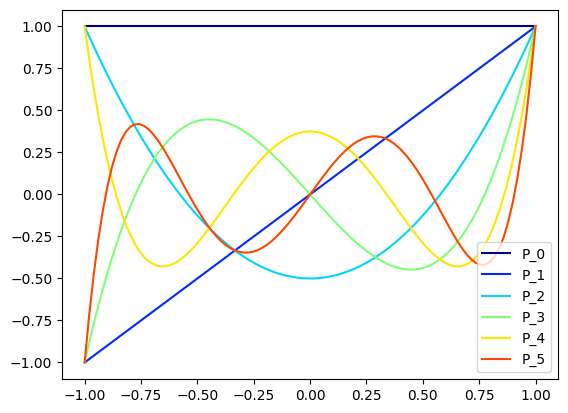

In [3]:
x = np.linspace(-1, 1, 100)
for i in range(6):
    plt.plot(x, special.eval_legendre(i, x), label=f"P_{i}",c=mapcolors(6)[i])
plt.legend()
plt.show()

### b) Schreibe eine Funktion zur Berechnung der Entwicklungskoeffizienten al. 
Teste sie anhand der Funktionen f0(x) = P0(x), f1(x) = P1(x), f2(x) = P2(x).

In [4]:
# funktion um  die ersten n entwicklungskoeggizienten zu bestimmen
def entw(f,n=6):
    # f ist die zu entwickelnde funktion
    # n ist die anzahl der entwicklungskoeffizienten
    # die entwicklungskoeffizienten werden in einem array gespeichert
    a = np.zeros(n)
    for i in range(n):
        a[i] = (2*i+1)/2*quad(lambda x: f(x)*special.eval_legendre(i,x),-1,1)[0]
    return a

a0=entw(lambda x: special.eval_legendre(0,x))
a1=entw(lambda x: special.eval_legendre(1,x))
a2=entw(lambda x: special.eval_legendre(2,x))
print(a0,a1,a2,sep='\n')

[ 1.00000000e+00  0.00000000e+00  1.73472348e-16  2.53371373e-17
  3.74700271e-16 -3.96044913e-16]
[ 0.00000000e+00  1.00000000e+00 -3.67921850e-17  3.40005801e-16
 -1.46364956e-16  2.48065457e-16]
[ 3.46944695e-17 -2.20753110e-17  1.00000000e+00 -1.66210323e-16
  2.34187669e-16 -3.44606913e-17]


### c) Berechne die Entwicklungskoeffizienten a_l für die Funktion f(x) = sin(πx)

In [5]:
entw(lambda x: np.sin(np.pi*x),12)

array([ 0.00000000e+00,  9.54929659e-01,  4.21334339e-18, -1.15824191e+00,
       -6.44539326e-18,  2.19289547e-01, -3.62027555e-16, -1.66422669e-02,
        2.17073788e-16,  6.82206703e-04,  8.59972949e-16, -1.75389259e-05])

### d) Plotte die Funktion sin(πx) und die Näherungen bis zur n-ten Ordnung. Wie gut konvergiert die Reihe?

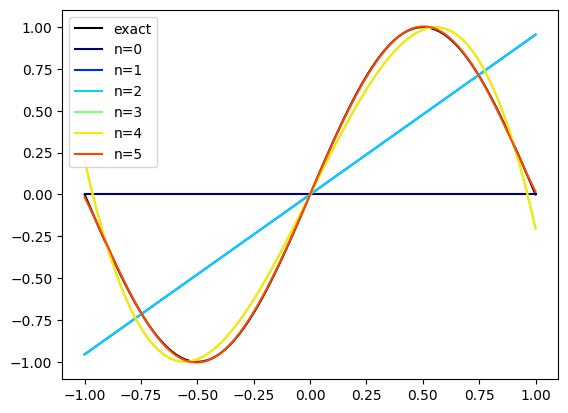

In [6]:
n= 6
plt.plot(x, np.sin(np.pi*x), label="exact",c='k')
a = entw(lambda x: np.sin(np.pi*x), n)
for i in range(n):
    y = a[i]*special.eval_legendre(i, x)
    # print(f"i={i}") 
    for j in range(i):
        y += a[j]*special.eval_legendre(j, x)
        # print(f"j={j}")
    plt.plot(x, y, label=f"n={i}",c=mapcolors(n)[i])

plt.legend()

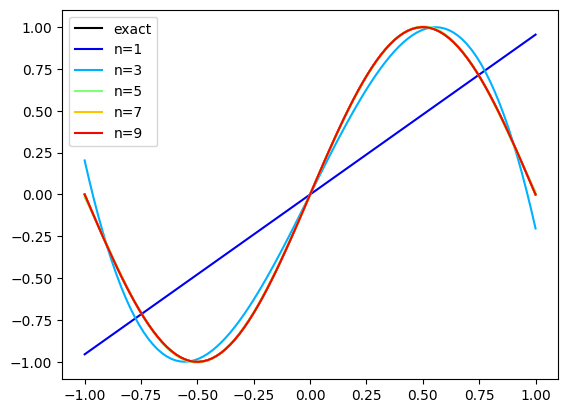

In [7]:
# only every seccond coefficient is "used"
n= 10
plt.plot(x, np.sin(np.pi*x), label="exact",c='k')
a = entw(lambda x: np.sin(np.pi*x), n)
for i in range(1,n,2):
    y = a[i]*special.eval_legendre(i, x)
    # print(f"i={i}") 
    for j in range(i):
        y += a[j]*special.eval_legendre(j, x)
        # print(f"j={j}")
    plt.plot(x, y, label=f"n={i}",c=mapcolors(n)[i])

plt.legend()

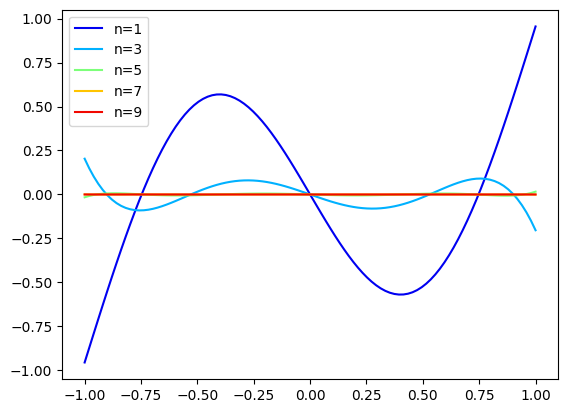

In [8]:
# plot difference
n= 10
a = entw(lambda x: np.sin(np.pi*x), n)
for i in range(1,n,2):
    y = a[i]*special.eval_legendre(i, x)
    # print(f"i={i}") 
    for j in range(i):
        y += a[j]*special.eval_legendre(j, x)
        # print(f"j={j}")
    y -= np.sin(np.pi*x)
    plt.plot(x, y, label=f"n={i}",c=mapcolors(n)[i])

plt.legend()

### e) Berechne analog die Fourier-Legendre Reihe fur die Dreiecksfunktion 
g(x) = 1 − |x| und die Rechtecksfunktion h(x) = 1 für x ∈ [−0.5, 0.5] 
Wie gut konvergiert die Fourier-Legendre-Reihe hier?

In [9]:
# dreiecksfunktion
def g(x):
    return 1 - np.abs(x)

# rechteckfunktion
def h(x):
    if type(x) == float or type(x) == int:
        if np.fabs(x) < .5:
            return 1
        else:
            return 0
    else:
        y = np.zeros(len(x))
        for xn in x:
            if np.fabs(xn) < .5:
                y[x == xn] = 1
        return y

[ 5.00000000e-01  0.00000000e+00 -6.25000000e-01  1.03151926e-16
  1.87500000e-01 -1.31837089e-16 -1.01562500e-01 -1.46542340e-16
  6.64062500e-02  2.04857160e-16 -4.78515625e-02  1.09335632e-17
  3.66210937e-02 -1.51330416e-16 -2.92053223e-02 -2.83989885e-16
  2.40020752e-02  1.26213325e-16 -2.01835632e-02  2.49075964e-16
  1.72824860e-02 -4.52135069e-17 -1.50167942e-02 -4.33113351e-16
  1.32070780e-02  9.58723284e-16 -1.17342770e-02 -8.66734221e-16
  1.05165690e-02 -5.32081143e-16 -9.49604670e-03 -2.70732337e-16]


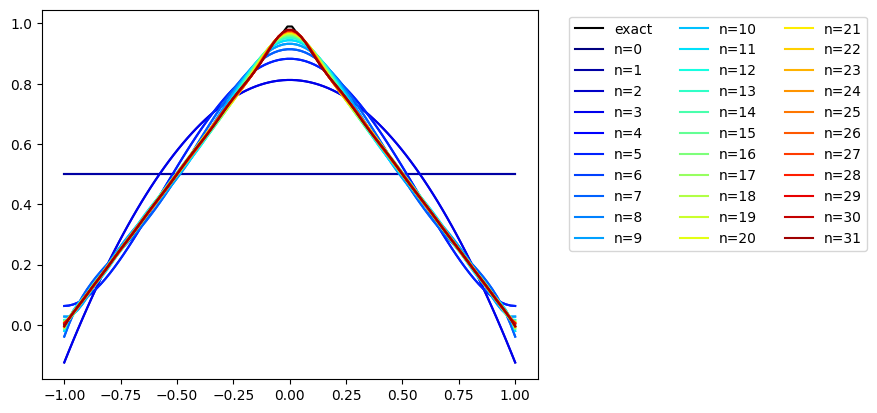

In [10]:
n= 32

plt.plot(x, g(x), label="exact",c='k')
a = entw(g, n)
print(a)
for i in range(n):
    y = a[i]*special.eval_legendre(i, x)
    for j in range(i):
        y += a[j]*special.eval_legendre(j, x)
    plt.plot(x, y, label=f"n={i}",c=mapcolors(n)[i])

plt.legend(ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')

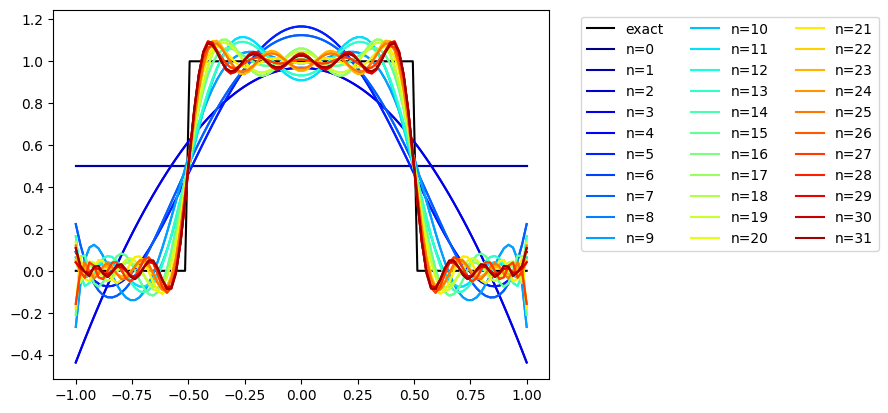

In [11]:
n = 32
plt.plot(x, h(x), label="exact",c='k')
a = entw(h, n)
for i in range(n):
    y = a[i]*special.eval_legendre(i, x)
    for j in range(i):
        y += a[j]*special.eval_legendre(j, x)
    plt.plot(x, y, label=f"n={i}",c=mapcolors(n)[i])

plt.legend(ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')